In [1]:
#Import Packages
##Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from scipy.signal import find_peaks

In [2]:
init_run_cols = ["Thickness", "d Thickness", "Bias_Voltage", "dBV", "Load Resistance", "Current", "Sample_Voltage","d BV", 
                 "Resistance", "Resistivity", "injection voltage", "sensitivity setting"]

raw_data0 = pd.read_csv("Resistivity Measurements - Sheet1.csv", names=init_run_cols, skiprows=2, skipfooter=2, engine="python")
raw_data0

,Thickness,d Thickness,Bias_Voltage,dBV,Load Resistance,Current,Sample_Voltage,d BV,Resistance,Resistivity,injection voltage,sensitivity setting
0,0.10,0.01,31.85,0.50,10000,0.003185,10.08,0.01,3164.835165,0.000003,0.16,50 mV
1,0.14,0.01,39.94,0.50,10000,0.003994,6.86,0.01,1717.576365,0.000002,0.16,50 mV
2,0.18,0.01,47.30,0.05,10000,0.004730,4.77,0.01,1008.456660,0.000002,0.16,50 mV
3,0.22,0.01,46.76,0.05,10000,0.004676,3.75,0.01,801.967494,0.000002,0.16,50 mV
4,0.25,0.01,48.21,0.05,10000,0.004821,3.03,0.01,628.500311,0.000001,0.16,50 mV
5,0.28,0.01,49.02,0.05,10000,0.004902,2.64,0.01,538.555692,0.000001,0.16,50 mV
6,0.32,0.01,49.58,0.05,10000,0.004958,2.33,0.01,469.947559,0.000001,0.16,50 mV
7,0.35,0.01,50.22,0.05,10000,0.005022,2.01,0.01,400.238949,0.000001,0.16,50 mV
8,0.39,0.01,50.58,0.05,10000,0.005058,1.83,0.01,361.803084,0.000001,0.16,50 mV
9,0.44,0.01,50.58,0.05,10000,0.005058,1.59,0.01,314.353499,0.000001,0.16,50 mV


In [3]:
#Get Data
cols = ["File_num",	"Thickness", "Bias_Voltage", "Sample_Voltage",	"Current", "Resistance", "Resistivity"]
raw_data1 = pd.read_csv("LAB 1 data file - Sheet1.csv", names=cols, skiprows=2)
raw_data2 = pd.read_csv("LAB 1 data file - Sheet2.csv", names=cols, skiprows=2, skipfooter=24, engine="python")
raw_data3 = pd.read_csv("LAB 1 data file - Sheet3.csv", names=cols, skiprows=7, skipfooter=0, engine="python")

raw_data3.head(10)

,File_num,Thickness,Bias_Voltage,Sample_Voltage,Current,Resistance,Resistivity
0,5260,0.072,0.198,0.18,1.980000e-08,9090.909091,0.000006
1,5261,0.073,1.633,1.39,1.633000e-07,8511.941212,0.000006
2,5262,0.074,3.481,2.96,3.481000e-07,8503.303648,0.000006
3,5263,0.075,5.442,4.26,5.442000e-07,7828.004410,0.000006
4,5264,0.076,7.018,5.31,7.018000e-07,7566.258193,0.000005
5,5265,0.077,8.878,6.26,8.878000e-07,7051.137644,0.000005
6,5266,0.078,10.961,7.21,1.096100e-06,6577.866983,0.000005
7,5267,0.079,12.263,7.75,1.226300e-06,6319.823860,0.000005
8,5268,0.080,14.067,8.31,1.512200e-06,5753.207248,0.000004
9,5269,0.081,15.122,8.70,1.694700e-06,5357.880451,0.000004


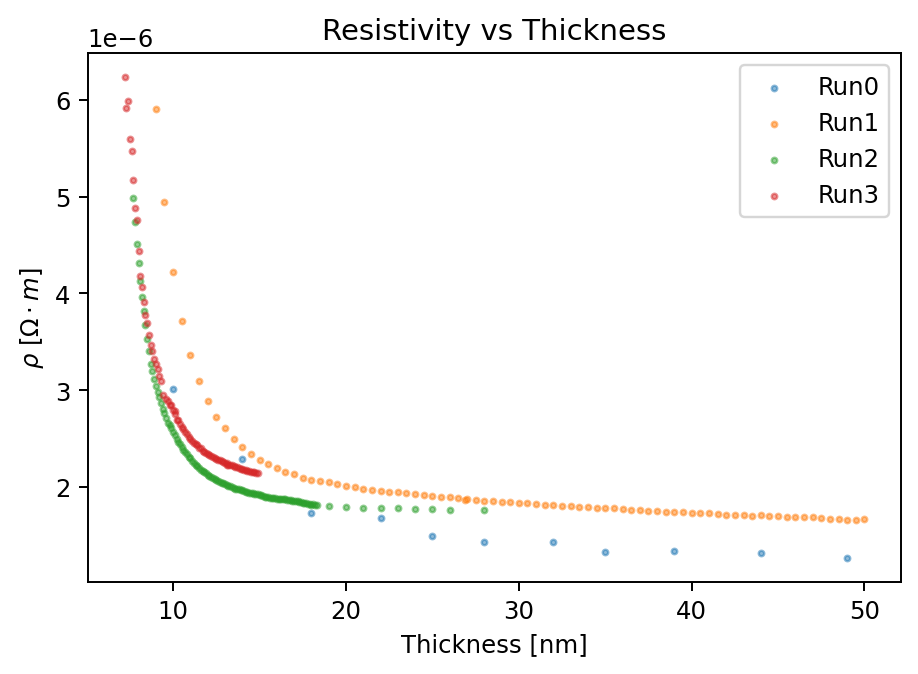

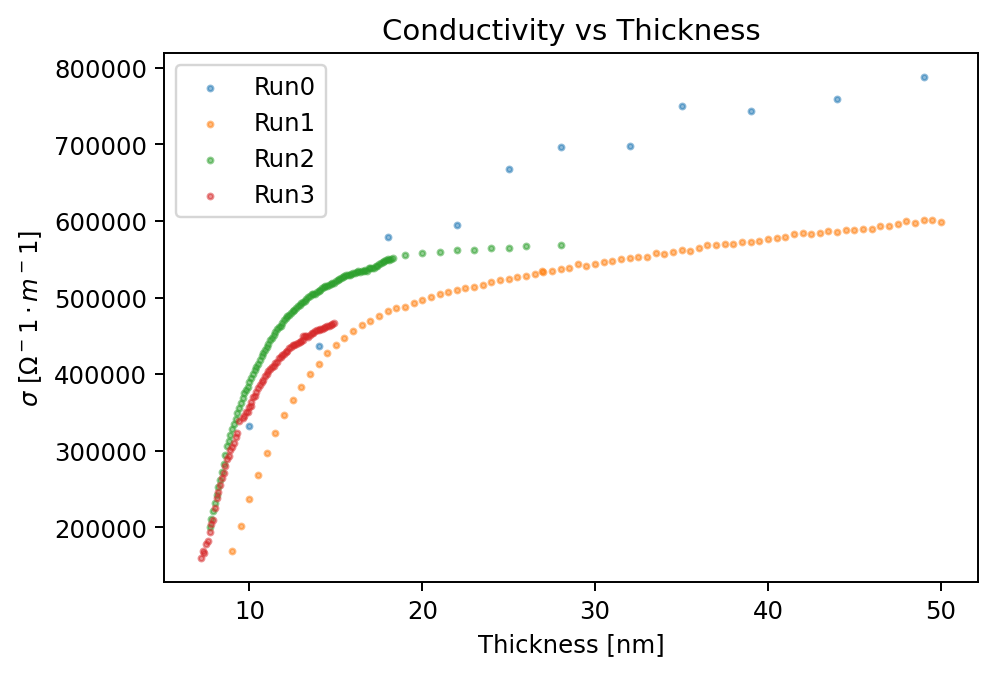

In [28]:
plt.figure(dpi=175)
plt.title("Resistivity vs Thickness")
plt.xlabel("Thickness [nm]")
plt.ylabel("$\\rho$ [$\Omega \cdot m$]")

plt.scatter(raw_data0["Thickness"]*100, raw_data0["Resistivity"], s=5, alpha=0.5, label="Run0")
plt.scatter(raw_data1["Thickness"]*100, raw_data1["Resistivity"], s=5, alpha=0.5, label="Run1")
plt.scatter(raw_data2["Thickness"]*100, raw_data2["Resistivity"], s=5, alpha=0.5, label="Run2")
plt.scatter(raw_data3["Thickness"]*100, raw_data3["Resistivity"], s=5, alpha=0.5, label="Run3")
plt.legend()
#plt.yscale("log")
#plt.legend()

plt.savefig("Plots/All_Data.pdf")
plt.show()

plt.figure(dpi=175)
plt.title("Conductivity vs Thickness")
plt.xlabel("Thickness [nm]")
plt.ylabel("$\\sigma$ [$\Omega^-1 \cdot m^-1$]")

plt.scatter(raw_data0["Thickness"]*100, 1/raw_data0["Resistivity"], s=5, alpha=0.5, label="Run0")
plt.scatter(raw_data1["Thickness"]*100, 1/raw_data1["Resistivity"], s=5, alpha=0.5, label="Run1")
plt.scatter(raw_data2["Thickness"]*100, 1/raw_data2["Resistivity"], s=5, alpha=0.5, label="Run2")
plt.scatter(raw_data3["Thickness"]*100, 1/raw_data3["Resistivity"], s=5, alpha=0.5, label="Run3")
plt.legend()
#plt.yscale("log")
#plt.legend()

plt.savefig("Plots/All_Data_Conductivity.pdf")
plt.show()

### Data Fitting

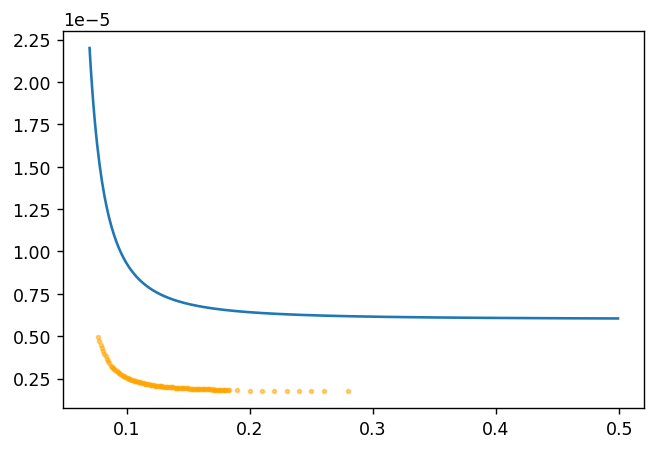

In [8]:
x = np.arange(0.07,0.5, 0.001)

plt.figure(dpi=125)
plt.scatter(raw_data2["Thickness"], raw_data2["Resistivity"], s=5, alpha=0.5, label="Run1", color="orange")

plt.plot(x, rational_func(x, *[10**-8,0.045,.6*10**-5, -2]))

[ 2.83397436e-09  5.62405192e-02  1.70403560e-06 -1.82260350e+00]
[2.82859696e-10 6.11175038e-04 4.22101866e-09 3.84832927e-02]
[9.98102521 1.08671656 0.24770719 2.11144622]


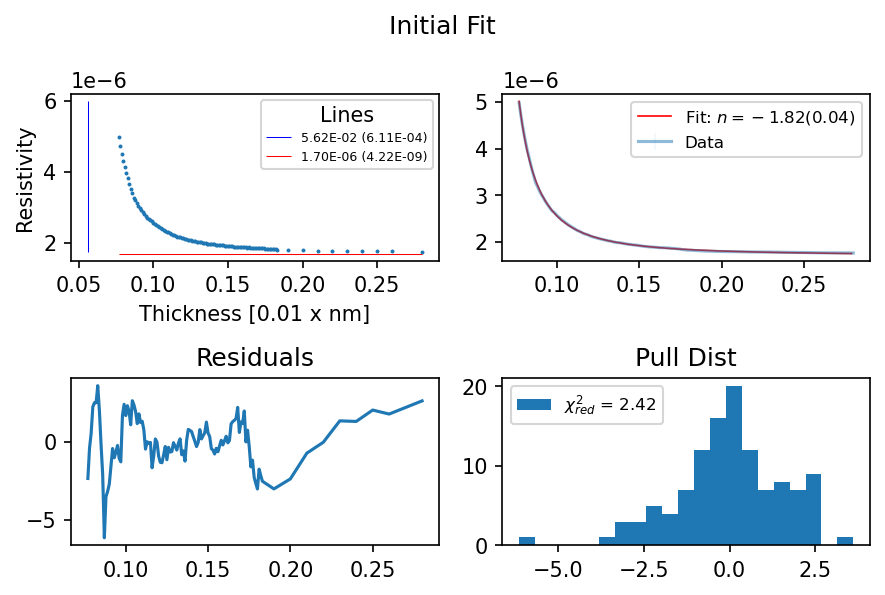

CPU times: user 624 ms, sys: 99.7 ms, total: 723 ms
Wall time: 741 ms


In [29]:
%%time
def rational_func(x, a,b,c, n):
    return a*(x-b)**n + c

func = rational_func

##Get Hist
plt.figure(dpi=150)
plt.suptitle(f"Initial Fit")
plt.subplot(2, 2, 1)
plt.xlabel("Thickness [0.01 x nm]")
plt.ylabel("Resistivity")

keeps = raw_data2["Thickness"] > -1

removes = []#[6, 10, 11]

run_num = 2

if len(removes) != 0:
    Thickness = np.delete(raw_data2["Thickness"].values, removes)#[keeps]
    Resistivity = np.delete(raw_data2["Resistivity"].values, removes)#[keeps]
    
else:
    Thickness = raw_data2["Thickness"].values
    Resistivity = raw_data2["Resistivity"].values

plt.scatter(Thickness, Resistivity, s=.8)

errors = Resistivity/400

#pars, cov = scipy.optimize.curve_fit(single_Gauss, frequency.values, signal.values, #maxfev=3*10**5, sigma=errors,
#                                     p0=[3,460,20, 1],
#                                     bounds=([0.01,380,1, 0],
#                                             [5,520,200, 1.5]))
pars, cov = scipy.optimize.curve_fit(func, Thickness, Resistivity, maxfev=3*10**5, sigma=errors,
                                     p0=[4*10**-8,0.05,.6*10**-5, -2],
                                     bounds=([10**-12,0.04,0, -10], [10**-5,1,1*10**-4, -0.1])
                                    )
#Mean Lines
plt.vlines(pars[1],np.min(Resistivity),np.max(Resistivity)*1.2, 
           label=f"{pars[1]:.2E} ({np.sqrt(cov.diagonal())[1]:.2E})", color="blue", lw=0.5)
plt.hlines(pars[-2],np.min(Thickness),np.max(Thickness), 
           label=f"{pars[-2]:.2E} ({np.sqrt(cov.diagonal())[-2]:.2E})", color="red", lw=0.5)

plt.legend(title="Lines", prop={"size":6})

#Plot Fit
plt.subplot(2, 2, 2)
x = np.arange(np.min(Thickness),np.max(Thickness),0.001)

plt.errorbar(Thickness, Resistivity, yerr=errors/10, 
             ms=.2, elinewidth=.1, alpha=0.5, label="Data")
plt.plot(x, func(x, *pars), color="red", lw=.8, label=f"Fit: $n={pars[-1]:2.2f} ({np.sqrt(cov[-1,-1]):.2f})$")
plt.legend(prop={"size":8})
#plt.xscale("log")
#plt.set_xticks(np.arange(300,901,50), minor=1)

print(pars)
print(np.sqrt(cov.diagonal()))
print(np.sqrt(cov.diagonal())/np.abs(pars)*100)

#Residuals
residuals = (Resistivity-func(Thickness, *pars))/errors
plt.subplot(2, 2, 3)
plt.title("Residuals")
plt.plot(Thickness, residuals)#, s=1)

#Pull Dist
plt.subplot(2, 2, 4)
plt.title("Pull Dist")
red = "{red}"
plt.hist(residuals, 21, label=f"$\chi_{red}^2$ = {np.sum(residuals**2)/len(residuals):.2f}")
plt.legend(prop={"size":8})

plt.tight_layout()
plt.savefig(f"Plots/Bi_Run{run_num}_Fit.pdf")
plt.show()

## Inverse Fitting

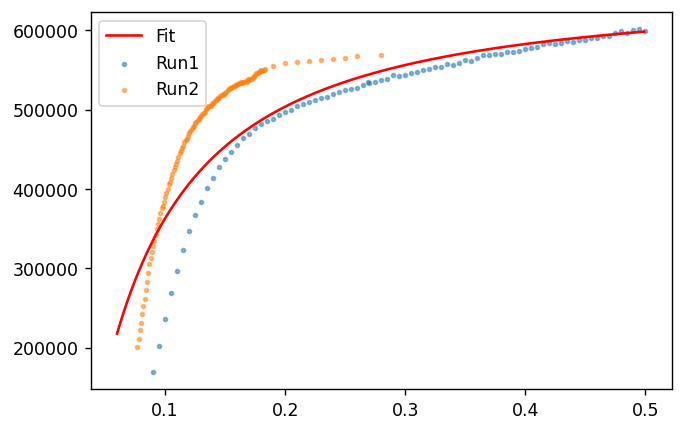

In [101]:
x = np.arange(0.06,0.5, 0.001)

plt.figure(dpi=125)
plt.scatter(raw_data1["Thickness"], 1/raw_data1["Resistivity"], s=5, alpha=0.5, label="Run1")
plt.scatter(raw_data2["Thickness"], 1/raw_data2["Resistivity"], s=5, alpha=0.5, label="Run2")
#[-9.95929545e+00 -5.88596914e-02  1.56198616e+05 -4.62916909e+00]
plt.plot(x, rational_func2(x, *[-.7*10**4, -0.02, .4,  6.5*10**5, -1.320]), color="red", label="Fit")
plt.legend()

[-6.91830866e+04 -9.33941787e-02  9.32438373e+05]
[2.08365801e+04 3.48678767e-02 4.45584657e+04]
[30.11802608 37.33410069  4.77870356]


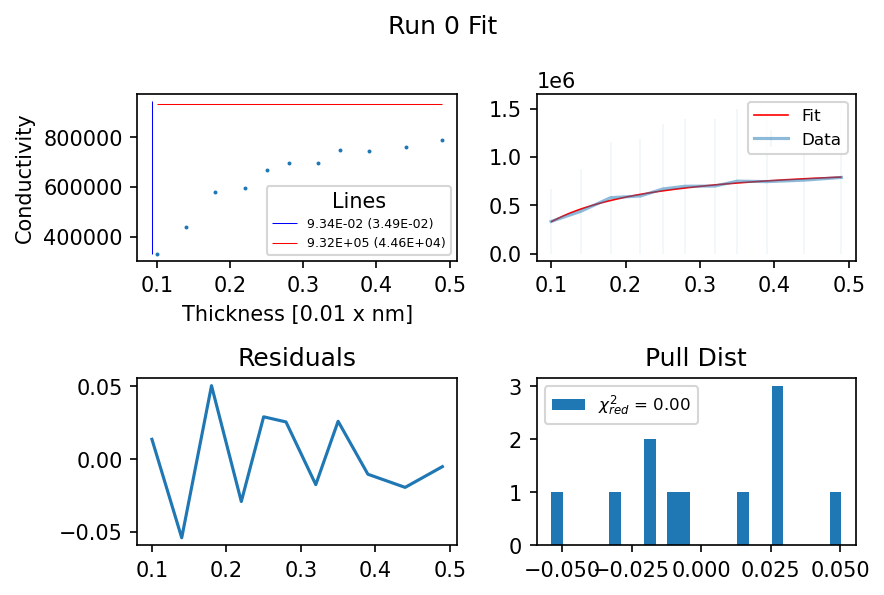

CPU times: user 859 ms, sys: 69.8 ms, total: 929 ms
Wall time: 1.12 s


In [125]:
%%time
def prof_func(x, a,b,c, n):
    return a*(1-(x/b)**n) + c

def prof_func2(x, a,b,c, n):
    return a*(x-b)**n + c

def logistic_func(x, a,b,x0, d):
    return a/(1+np.exp(-b*(x-x0))) + d

def rational_func(x, a,b,c, n):
    return a*(x-b)**n + c

def rational_func2(x, a,b,c,d, n):
    return a*(c*x-b)**n + d

def rational_func_lockn(x, a,b,c):
    return a*(x-b)**-1.32 + c

func = rational_func_lockn
data_set = raw_data0
run_num = 0

##Get Hist
plt.figure(dpi=150)
plt.suptitle(f"Run {run_num} Fit")
plt.subplot(2, 2, 1)
plt.xlabel("Thickness [0.01 x nm]")
plt.ylabel("Conductivity")

keeps = data_set["Thickness"] > -0.18

removes = []#np.arange(0,10,1)#[0,1,2,3,4,5]#[0,1,3]#[6, 10, 11]

if len(removes) != 0:
    Thickness = np.delete(data_set["Thickness"][keeps].values, removes)#[keeps]
    Resistivity = np.delete(1/data_set["Resistivity"][keeps].values, removes)#[keeps]
    
else:
    Thickness = data_set["Thickness"][keeps].values
    Resistivity = 1/data_set["Resistivity"][keeps].values

plt.scatter(Thickness, Resistivity, s=.8)

errors = Resistivity

#pars, cov = scipy.optimize.curve_fit(single_Gauss, frequency.values, signal.values, #maxfev=3*10**5, sigma=errors,
#                                     p0=[3,460,20, 1],
#                                     bounds=([0.01,380,1, 0],
#                                             [5,520,200, 1.5]))
pars, cov = scipy.optimize.curve_fit(func, Thickness, Resistivity, maxfev=10**5, sigma=errors,
                                     p0=[-.7*10**4, -0.02,  6.5*10**5], #[-100,-0.06,1.7*10**5, -1.32],
                                     bounds=([-10**10,-0.1,0], [-1,-0.01,10**8])
                                    )
#Mean Lines
plt.vlines(-pars[1],np.min(Resistivity),np.max(Resistivity)*1.2, 
           label=f"{-pars[1]:.2E} ({np.sqrt(cov.diagonal())[1]:.2E})", color="blue", lw=0.5)
plt.hlines(pars[-1],np.min(Thickness),np.max(Thickness), 
           label=f"{pars[-1]:.2E} ({np.sqrt(cov.diagonal())[-1]:.2E})", color="red", lw=0.5)

plt.legend(title="Lines", prop={"size":6})

#Plot Fit
plt.subplot(2, 2, 2)
x = np.arange(np.min(Thickness)*1.01,np.max(Thickness),0.001)

plt.errorbar(Thickness, Resistivity, yerr=errors, 
             ms=.2, elinewidth=.1, alpha=0.5, label="Data")
plt.plot(x, func(x, *pars), color="red", lw=.8, label=f"Fit")#: $n={pars[-1]:2.2f} ({np.sqrt(cov[-1,-1]):.2f})$")
plt.legend(prop={"size":8})
#plt.xscale("log")
#plt.set_xticks(np.arange(300,901,50), minor=1)

print(pars)
print(np.sqrt(cov.diagonal()))
print(np.sqrt(cov.diagonal())/np.abs(pars)*100)

#Residuals
residuals = (Resistivity-func(Thickness, *pars))/errors
plt.subplot(2, 2, 3)
plt.title("Residuals")
plt.plot(Thickness, residuals)#, s=1)

#Pull Dist
plt.subplot(2, 2, 4)
plt.title("Pull Dist")
red = "{red}"
plt.hist(residuals, 25, label=f"$\chi_{red}^2$ = {np.sum(residuals**2)/len(residuals):.2f}")
plt.legend(prop={"size":8})

plt.tight_layout()
#plt.savefig(f"Plots/Bi_Run2_ConductivityFit.pdf")
plt.show()

In [66]:
residuals

array([-3.02066463, -2.08168293, -0.38487153,  1.24849157,  5.03974939,
        2.35477967,  2.00250452,  1.57115605,  0.50848048, -0.55568044,
        0.14607721, -0.08993253, -0.41007371,  0.5280563 ,  0.88168393,
       -1.98252694, -2.59801821, -1.76254252, -2.30727785, -1.86979348,
       -0.90197951, -2.38876837, -2.05034366, -1.55937121, -0.73692605,
       -1.32617854, -0.72931408, -0.78429706, -0.2119618 ,  1.04235872,
        0.58192769,  0.69872063,  0.63526925,  2.24957127,  1.48466631,
        0.39476528,  0.59784832,  1.47889825,  1.84617532,  1.85125775,
        1.33482255,  0.77189631,  1.59501341,  0.77606701,  1.05170851,
        0.99419479,  0.39844883,  0.60203623,  0.81329037,  0.33934958,
        0.03500134,  1.02127542,  0.75162716,  1.37606749,  0.00506033,
       -0.71489857, -0.68370983, -0.62817132, -0.33089351, -0.05012278,
        0.25143975, -0.03504653, -0.8875857 , -0.30904969, -0.54238705,
       -0.75006001, -1.46273211, -0.78378466, -0.56598676,  0.18

In [127]:
np.random.normal(0.3, 0.05, [2, 1])

array([[0.28980825],
       [0.19154942]])

In [131]:
num = 2
results = (np.random.normal(Thickness,0.001, [num, len(Thickness)]) * 
           np.random.normal(Resistivity,Resistivity*0.01, [num, len(Thickness)]) *
           np.random.normal(0.003, 0.0005, [num, len(Thickness)]) /
           np.random.normal(.0315, 0.0005, [num, len(Thickness)]))


In [132]:
results

array([[ 3029.74402182,  5742.23501497,  8985.87888933, 12805.64918039,
        19110.97162944, 14699.09956543, 21953.49436864, 23975.44913894,
        29497.96666948, 36620.86653544, 34593.46132352],
       [ 2640.60791415,  6221.43455343, 12399.02668288, 12031.82350051,
        18736.23168775, 20494.25285162, 17107.13118633, 22300.45768147,
        20543.12661911, 28542.83358136, 38434.92231119]])

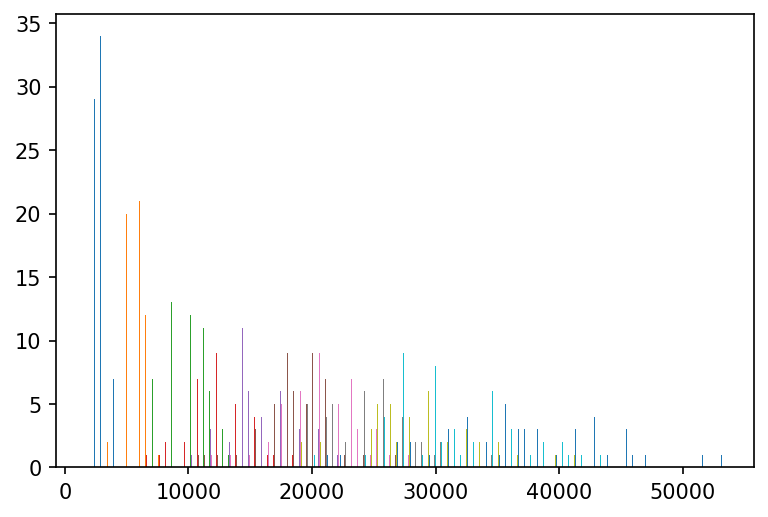

In [130]:
plt.figure(dpi=150)

plt.hist(results, 100)

plt.show()